In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
dataset=pd.read_csv (r'D:\DSA_2019\churn.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               

In [4]:
dataset.isnull().sum()
dataset_clean=dataset.dropna()

# Explore Data
Separating catagorical and numerical columns

In [5]:
dataset['phone_number']=dataset['phone_number'].astype('str')
dataset['area_code']=dataset['area_code'].astype('category')

State: the US state in which the customer resides, it should be indicated by a two-letter abbreviation; for example, OH or NJ
<br> Account Length: the number of days that this account has been active
<br> Area Code: the three-digit area code of the corresponding customer’s phone number
<br> Phone_number: the remaining seven-digit phone number
<br> Int’l Plan: whether the customer has an international calling plan: yes/no
<br> VMail Plan: whether the customer has a voice mail feature: yes/no
<br> VMail Message: presumably the average number of voice mail messages per month
<br> Day Mins: the total number of calling minutes used during the day
<br> Day Calls: the total number of calls placed during the day
<br> Day Charge: the billed cost of daytime calls
<br> Eve Mins, Eve Calls, Eve Charge: the billed cost for calls placed during the evening
<br> Night Mins, Night Calls, Night Charge: the billed cost for calls placed during nighttime
<br> Intl Mins, Intl Calls, Intl Charge: the billed cost for international calls
<br> CustServ Calls: the number of calls placed to Customer Service
<br> Class?: whether the customer left the service: true/false
<br> The last attribute, Class? or Churn?, is known as the target attribute–the attribute that we want the ML model to predict. <br> Because the target attribute is binary, our model will be performing binary prediction, also known as binary classification.
***

In [6]:
dataset.nunique()

state                              51
account_length                    218
area_code                           3
phone_number                     5000
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
total_night_minutes              1853
total_night_calls                 131
total_night_charge               1028
total_intl_minutes                170
total_intl_calls                   21
total_intl_charge                 170
number_customer_service_calls      10
class                               2
dtype: int64

In [7]:
dataset.columns.tolist()

['state',
 'account_length',
 'area_code',
 'phone_number',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'class']

In [8]:
dataset.describe()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null category
phone_number                     5000 non-null object
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes           

# Data Overview

In [10]:
print ("Rows     : " ,dataset.shape[0])
print ("Columns     : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n", dataset.nunique())
print ("Number of State : ",len(np.unique(dataset["state"])))

Rows     :  5000
Columns     :  21

Features : 
 ['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'class']

Missing values :   0

Unique values :  
 state                              51
account_length                    218
area_code                           3
phone_number                     5000
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              48
total_day_minutes                1961
total_day_calls                   123
total_day_charge                 1961
total_eve_minutes                1879
total_eve_calls                   126
total_eve_charge                 1659
t

# Exclude 'object' columns for descriptive statistics purpose

In [11]:
dataset.select_dtypes(exclude='object').columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [12]:
numeric_var=['international_plan','voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class']

# What is the absolute correlation value of all numeric variables towards class? Sort from higher correlation to lower.

In [13]:
abs(dataset[numeric_var].corr()['class']).sort_values(ascending=False)

class                            1.000000
international_plan               0.259123
number_customer_service_calls    0.212564
total_day_minutes                0.207705
total_day_charge                 0.207700
voice_mail_plan                  0.110698
number_vmail_messages            0.097633
total_eve_minutes                0.089288
total_eve_charge                 0.089282
total_intl_minutes               0.063285
total_intl_charge                0.063275
total_intl_calls                 0.046893
total_night_minutes              0.045677
total_night_charge               0.045673
total_day_calls                  0.016130
total_night_calls                0.006986
total_eve_calls                  0.006284
Name: class, dtype: float64

# Create "Churn" column, if class = 1 then 'Churn', else 'Not_Churn'

In [14]:
churn_group=["Churn" if x==1 else "Not_Churn" for x in dataset['class']]
dataset['churn_group'] = churn_group

# Slicing Dataframe into two: Churn if churn_group = 'Churn', Not_Churn if churn_group='Not_Churn'

In [15]:
cust_churn = dataset[dataset['churn_group']=="Churn"]
cust_notchurn = dataset[dataset['churn_group']=="Not_Churn"]

# t-test

In [16]:
from scipy import stats
for item in numeric_var:
    a = stats.ttest_ind(cust_churn[item], cust_notchurn[item],  equal_var = False)
    if (a.pvalue<0.05):
        print(item)

international_plan
voice_mail_plan
number_vmail_messages
total_day_minutes
total_day_charge
total_eve_minutes
total_eve_charge
total_night_minutes
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls
class


# Correlation value

In [17]:
abs(dataset[numeric_var].corr()['class']).sort_values(ascending=False)

class                            1.000000
international_plan               0.259123
number_customer_service_calls    0.212564
total_day_minutes                0.207705
total_day_charge                 0.207700
voice_mail_plan                  0.110698
number_vmail_messages            0.097633
total_eve_minutes                0.089288
total_eve_charge                 0.089282
total_intl_minutes               0.063285
total_intl_charge                0.063275
total_intl_calls                 0.046893
total_night_minutes              0.045677
total_night_charge               0.045673
total_day_calls                  0.016130
total_night_calls                0.006986
total_eve_calls                  0.006284
Name: class, dtype: float64

# The Differences between Churn and Not_Churn Subscribers

In [18]:
cust_churn[['total_day_minutes','total_day_charge','number_customer_service_calls','international_plan']].mean().round(2)

total_day_minutes                207.87
total_day_charge                  35.34
number_customer_service_calls      2.25
international_plan                 0.28
dtype: float64

In [19]:
cust_notchurn[['total_day_minutes','total_day_charge','number_customer_service_calls','international_plan']].mean().round(2)

total_day_minutes                175.75
total_day_charge                  29.88
number_customer_service_calls      1.46
international_plan                 0.06
dtype: float64

"""
From the statistics above, we can conclude that:
customer_churn make more money (day_charge), customer_churn are more likely to call customer_service and customer_churn has more International_Plan.
"""

# Data Distribution

In [20]:
#dataset.drop(['class','state','account_length'],axis=1).hist()

In [21]:
dataset[['total_day_minutes','total_day_charge']].describe()

,total_day_minutes,total_day_charge
count,5000.000000,5000.000000
mean,180.288900,30.649668
std,53.894699,9.162069
min,0.000000,0.000000
25%,143.700000,24.430000
50%,180.100000,30.620000
75%,216.200000,36.750000
max,351.500000,59.760000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A59C940>,
      dtype=object)

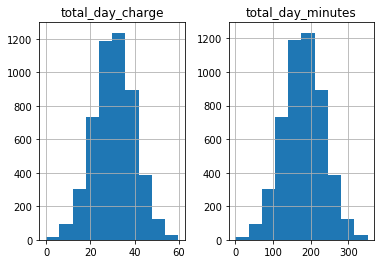

In [22]:
dataset[['total_day_minutes','total_day_charge']].hist()

In [23]:
dataset[['total_eve_minutes','total_eve_charge']].describe()

,total_eve_minutes,total_eve_charge
count,5000.000000,5000.000000
mean,200.636560,17.054322
std,50.551309,4.296843
min,0.000000,0.000000
25%,166.375000,14.140000
50%,201.000000,17.090000
75%,234.100000,19.900000
max,363.700000,30.910000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A5A0860>,
      dtype=object)

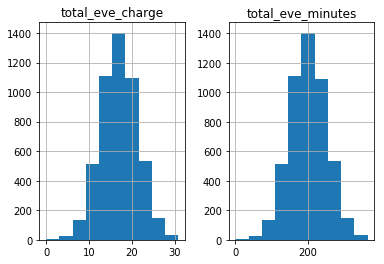

In [24]:
dataset[['total_eve_minutes','total_eve_charge']].hist()

In [25]:
dataset[['total_night_minutes','total_night_charge']].describe()

,total_night_minutes,total_night_charge
count,5000.000000,5000.000000
mean,200.391620,9.017732
std,50.527789,2.273763
min,0.000000,0.000000
25%,166.900000,7.510000
50%,200.400000,9.020000
75%,234.700000,10.560000
max,395.000000,17.770000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A53AE48>,
      dtype=object)

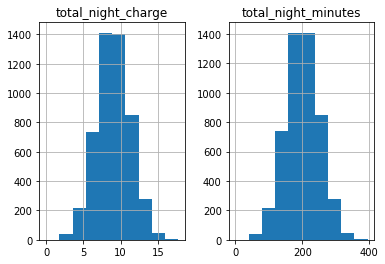

In [26]:
dataset[['total_night_minutes','total_night_charge']].hist()

In [27]:
dataset[['total_intl_minutes','total_intl_charge',]].describe()

,total_intl_minutes,total_intl_charge
count,5000.000000,5000.000000
mean,10.261780,2.771196
std,2.761396,0.745514
min,0.000000,0.000000
25%,8.500000,2.300000
50%,10.300000,2.780000
75%,12.000000,3.240000
max,20.000000,5.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A238EB8>,
      dtype=object)

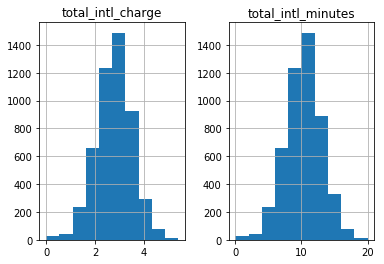

In [28]:
dataset[['total_intl_minutes','total_intl_charge',]].hist()

In [29]:
dataset[['total_intl_calls','number_customer_service_calls']].describe()

,total_intl_calls,number_customer_service_calls
count,5000.000000,5000.000000
mean,4.435200,1.570400
std,2.456788,1.306363
min,0.000000,0.000000
25%,3.000000,1.000000
50%,4.000000,1.000000
75%,6.000000,2.000000
max,20.000000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007002470>,
      dtype=object)

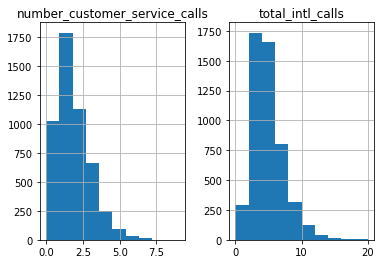

In [30]:
dataset[['total_intl_calls','number_customer_service_calls']].hist()